# XI.9.3a

Построить алгоритм метода пристрелки для вычисления нелинейных задач

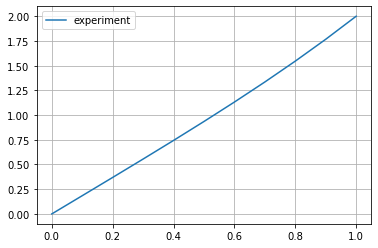

In [2]:
import numpy
import math
import matplotlib.pyplot as plt


x = [0, 1]
y = [0, 2]
con = 2
y_0 = 0
err = 1e-6
h = 0.1

def f(x, y):
    return x * y**(1/2)

def func(x, q, f):
    y = q[0]
    v = q[1]
    return numpy.array([v, f(x, y)])


def rung_k(h, q_0, x, f):  # метод рунге-кутты 4 порядка
    x_ = numpy.arange(x[0], x[1], h)
    q = []
    q.append(q_0)
    for i in range(1, len(x_) + 1):
        x__ = x[0] + (i - 1) * h
        f_1 = func(x__, q[-1], f)
        f_2 = func(x__ + h * 0.5, q[-1] + 0.5 * h *  f_1, f)
        f_3 = func(x__ + h * 0.5, q[-1]  + 0.5 * h * f_2, f)
        f_4 = func(x__ + h, q[-1] + h * f_3, f)
        q.append(q[-1] + (1/6) * h * (f_1 + 2 * f_2 + 2 * f_3 + f_4))
    return q

def solve(a, x, h, y_0, f):
    q = rung_k(h, numpy.array([y_0, a]), x, f)
    y = [q[i][0] for i in range(len(q))]
    v = [q[i][1] for i in range(len(q))]
    return y, v

def delta(y):
    return y[-1] - con

def change_interval(a_mid, d_mid, a, d):
    if d[1] * d_mid > 0:
        d[1] = d_mid
        a[1] = a_mid
    else:
        d[0] = d_mid
        a[0] = a_mid
    return a, d    

def visual(x, answer):
    h = (x[1] - x[0]) / (len(answer) - 1)
    x_ = numpy.arange(x[0], x[1] + h/2 , h)
    plt.plot(x_, answer, label = 'experiment')
    plt.legend()
    plt.grid()
    plt.show()

a = [0, 2] # start a of different sign
y_1, v_1 = solve(a[0], x, h, y_0, f)
y_2, v_2 = solve(a[1], x, h, y_0, f)
d = [delta(y_1), delta(y_2)]
y = y_1

while(abs(delta(y)) >= err):  # деление пополам
    a_mid = sum(a) / len(a)
    y, v = solve(a_mid, x, h, y_0, f)
    d_mid = delta(y)
    a, d = change_interval(a_mid, d_mid, a, d)

visual(x, y)


# X.9.3

Уравнение Релея

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

m = 1000
h = 0.0001


def rev_matrix(x):
    b = np.array([[1 - h * m * (1 - 3 * x[1] * x[1]), h], [-h, 1]])
    det = 1 - h * m * (1 - 3 * x[1] * x[1]) + h * h
    return b / det


def Newton_method(u0):
    u_old = u0
    eps = 1e-6
    f = np.array([-h * u_old[1], -h * (m * (1 - u_old[1] * u_old[1]) * u_old[1] - u_old[0])])
    u_new = u_old - rev_matrix(u_old).dot(f)
    while (u_old[0] - u_new[0]) ** 2 + (u_old[1] - u_new[1]) ** 2 > eps:
        u_old = u_new
        f = np.array([-h * u_old[1], -h * (m * (1 - u_old[1] * u_old[1]) * u_old[1] - u_old[0])])
        u_new = u_old - rev_matrix(u_old).dot(f)
    return u_new


x0, p0 = 0, 0.001
u = [np.array([x0, p0])]
T = 1000
N = int(T / h)
with tqdm(total=N) as pbar:
    for i in range(N):
        u.append(Newton_method(u[-1]))
        pbar.update(1)
t = np.arange(0.0, 1000 + h, h)
fig, ax = plt.subplots()
ax.plot(t, u)
ax.grid()
plt.show()

  5%|▍         | 478882/10000000 [00:18<06:16, 25282.39it/s]


KeyboardInterrupt: 

100%|████████████████████████████████████████████████████████████████████▉| 785396/785397 [00:00<00:00, 1089364.98it/s]


y(0.5) = 0.17393963558108771
y(1) = 0.49490734524961877
y(1.5) = 0.9601014516218845
y(2) = 1.55110657973199
y(2.5) = 2.2290556080532697
y(3) = 2.9385281456577803


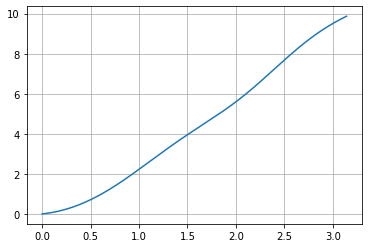

In [ ]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


# Метод прогонки
def solveTriagonalSlae(a, b, c, d):
    N = len(a)
    a = [0] + a

    p = [0] + [-c[0] / b[0]]
    q = [0] + [d[0] / b[0]]
    with tqdm(total=N) as pbar:
        for i in range(1, N):
            znam = a[i] * p[i] + b[i]
            p.append(-c[i] / znam)
            q.append((d[i] - a[i] * q[i]) / znam)
            pbar.update(1)

    yN = (d[N] - a[N] * q[N]) / (a[N] * p[N] + b[N])
    result = [0 for _ in range(N)] + [yN]
    for i in range(N - 1, -1, -1):
        result[i] = p[i + 1] * result[i + 1] + q[i + 1]
    return result


def g(x): return x ** 2 - 3


def h(x): return (x ** 2 - 3) * m.cos(x)


def f(x): return 2 - 6 * x + 2 * x ** 3 + (x * x - 3) * m.exp(x) * m.sin(x) * (1 + m.cos(x)) + m.cos(x) * (
        m.exp(x) + (x * x - 1) + x ** 4 - 3 * x * x)


y0, yN = 0, m.pi ** 2
x0, xN = 0, 3.14159
tau = 0.000004
n = int(xN / tau)
a = [1 for i in range(1, n)] + [0]
b = [1] + [-2 - tau * g(i * tau) + tau * tau * h(i * tau) for i in range(1, n)] + [1]
c = [0] + [1 + g(i * tau) * tau for i in range(1, n)]
d = [y0] + [tau * tau * f(i * tau) for i in range(1, n)] + [yN]
y = solveTriagonalSlae(a, b, c, d)
print('y(0.5) =', y[50000])
print('y(1) =', y[2 * 50000])
print('y(1.5) =', y[3 * 50000])
print('y(2) =', y[4 * 50000])
print('y(2.5) =', y[5 * 50000])
print('y(3) =', y[6 * 50000])

t = np.arange(x0, xN, tau)
fig, ax = plt.subplots()
ax.plot(t, y)
ax.grid()
plt.show()
